In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fonction as fct

In [2]:
marketing_df= pd.read_csv('https://raw.githubusercontent.com/JosueAfouda/Marketing-Pandas/master/marketing.csv')
marketing_df.shape


(10037, 12)

In [19]:
#il s'agit ici  de comparer language_displayed à language_preferred
marketing_df['is_correct_lang']= np.where(marketing_df['language_displayed']==marketing_df['language_preferred'], True,False)

### Objectif

Ici il est question de construire des indicateurs qui nous permettrons d'évaluer l'éfficacité ou l'impact de la campagne à l'instar de :

-  Taux de conversion : évalué le changement d'habitude ou de produit après la campagne
-  Taux de retention: pourcentage de personnes qui reste abonnées après une certaine période 

#### 1- Taux de conversion global

In [10]:
### Taux de conversion global

## Nombre d'utilisateur de notre base 
n_unique_user = marketing_df['user_id'].nunique()
print(" Le nombre d'utilisateurs uniques est: ",n_unique_user)

## Nombre d'utilisateur ayant soucrit au service
n_souscripteurs = marketing_df[marketing_df['converted']==True]['user_id'].nunique()
print('\n')
print(" Le nombre d'utilisateurs uniques est: ",n_souscripteurs)

## Taux de conversion
taux_conv_global= n_souscripteurs/n_unique_user
print('\n')
print(" Le taux de conversion global est égal à : ",
                   round(taux_conv_global*100,2),'%')

 Le nombre d'utilisateurs uniques est:  7309


 Le nombre d'utilisateurs uniques est:  1015


 Le taux de conversion global est égal à :  13.89 %


In [24]:
## Nombre d'utilisateur de notre base 
def conversion(df,columns_names):

    col_user_total = df.groupby(columns_names)['user_id'].nunique()

    col_convert = df[df['converted']==True].groupby(columns_names)['user_id'].nunique()
    
    conversion_rate = col_convert/col_user_total

    # remplacemen des valeurs manquantes par 0
    conversion_rate=conversion_rate.fillna(0)

    print(" Les taux de conversion suivant le",columns_names," sont:")
    return conversion_rate

In [26]:
conversion(marketing_df,['subscribing_channel'])

 Les taux de conversion suivant le ['subscribing_channel']  sont:


subscribing_channel
Email        0.838542
Facebook     1.000000
House Ads    1.000000
Instagram    1.000000
Push         1.000000
Name: user_id, dtype: float64

In [27]:
conversion(marketing_df,['date_served','age_group'])

 Les taux de conversion suivant le ['date_served', 'age_group']  sont:


date_served  age_group  
1/1/18       0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
1/9/18       24-30 years    0.152174
             30-36 years    0.090909
             36-45 years    0.093023
             45-55 years    0.068182
             55+ years      0.102564
Name: user_id, Length: 217, dtype: float64

#### 2- Taux de retention global

In [12]:
### Taux de retention global d'un mois

## Nombre de personnes qui sont restées abonnés
retained = marketing_df[marketing_df['is_retained']==True]['user_id'].nunique()


## Taux de retention
taux_retention_global= retained/n_souscripteurs
print('\n')
print(" Le taux de retentionion global est égal à : ",
                   round(taux_retention_global*100,2),'%')



 Le taux de retentionion global est égal à :  66.8 %


In [21]:
### Taux de conversion global

## Nombre d'utilisateur de notre base 
def retention(df,columns_names):

    retained = df[df['is_retained']==True].groupby(columns_names)['user_id'].nunique()
    convert = df[df['converted']==True].groupby(columns_names)['user_id'].nunique()
    
    retention_rate = retained/convert

    print(" Les taux de retention suivant le",columns_names," sont:")
    return retention_rate

    


In [22]:
### Taux de retention suivant le canal d'abonnement
retention(marketing_df,['subscribing_channel'])

 Les taux de retention suivant le ['subscribing_channel']  sont:


subscribing_channel
Email        0.875776
Facebook     0.687783
House Ads    0.580537
Instagram    0.681034
Push         0.701299
Name: user_id, dtype: float64

 Les taux de retention suivant le ['language_displayed']  sont:
language_displayed
Arabic     0.750000
English    0.668467
German     0.773585
Spanish    1.000000
Name: user_id, dtype: float64


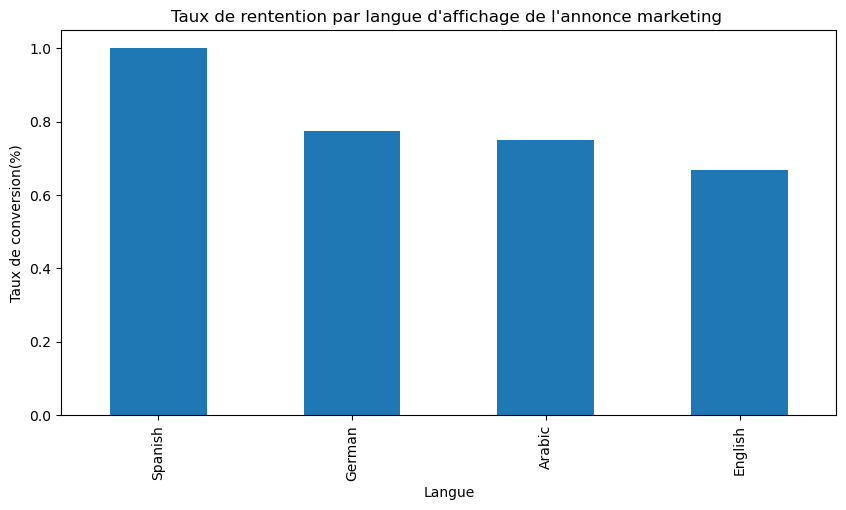

In [23]:
### Taux de retention suivant la langue d'affichage

retention_per_language=retention(marketing_df,['language_displayed'])
print (retention_per_language)


## Affichage 
plt.figure(figsize=(10, 5))
retention_per_language.sort_values(ascending= False).plot(kind= 'bar')

plt.title("Taux de rentention par langue d'affichage de l'annonce marketing ")
plt.xlabel('Langue')
plt.ylabel("Taux de conversion(%)")
plt.show()